In [ ]:
%%capture
!pip install adjustText

Plotting the Profile

            Distance    Longitude     Latitude   Elevation
194        20.222632  512890.5450  2443528.197  404.630005
195        20.331707  512890.6454  2443528.240  404.609985
196        20.440783  512890.7458  2443528.283  404.579987
197        20.549858  512890.8462  2443528.325  404.569977
198        20.658933  512890.9465  2443528.368  404.559998
...              ...          ...          ...         ...
446630  49722.555430  536759.5797  2433750.171  238.699997
446631  49722.659460  536759.5511  2433750.071  238.709992
446632  49722.763480  536759.5225  2433749.971  238.699997
446633  49722.867510  536759.4938  2433749.871  238.699997
446634  49722.971530  536759.4652  2433749.771  238.720001

[446441 rows x 4 columns]
     Distance  Placeholder
0         NaN          NaN
1    1624.930          1.0
2    2038.681          1.0
3    2556.365          1.0
4    2838.325          1.0
..        ...          ...
58  46155.230          1.0
59  47924.750          1.0
60  48253.535         

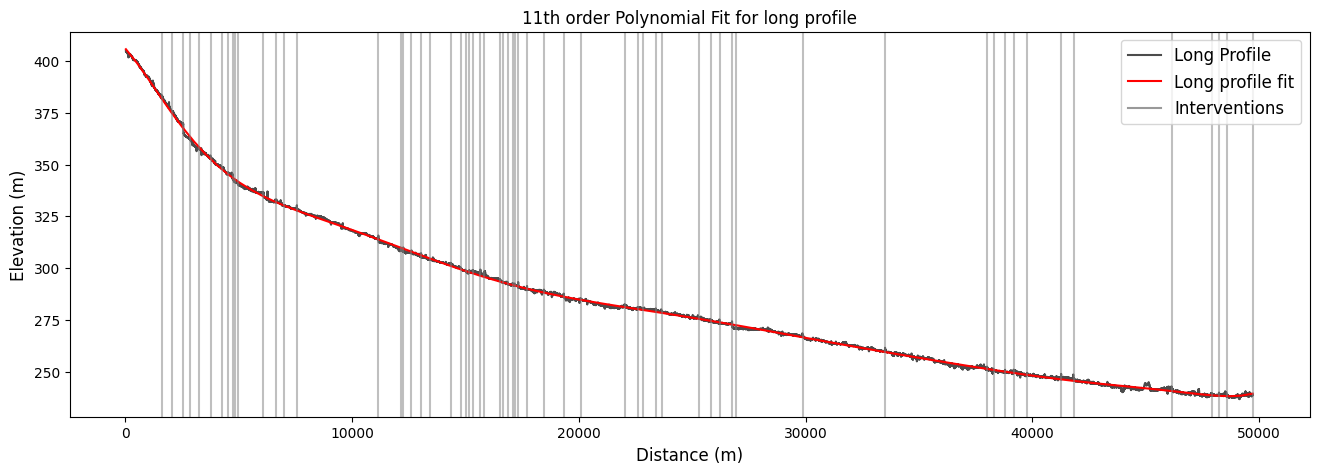

In [ ]:
'''This code imports the csv file containing the thalweg profile.
All rows with "None" values are dropped wile importing the csv.
It then fits an 11th-degree polynomial to data in a
DataFrame with columns Distance and Elevation. The script calculates the
standard deviation of the residuals, the R-squared value, and plots the
fitted polynomial and the original data. '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from google.colab import drive


# Replace with the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Kawardha/Full_profile.csv'

# Read the CSV file and create a DataFrame
df = pd.read_csv(file_path, low_memory=False,na_values ='None')

# Reject rows with "None" value in any column and save it to the same dataframe
df = df.dropna(how='any')
print(df)

# read the file containing the positions for the interventions.
df_xpos = pd.read_excel('/content/drive/MyDrive/Kawardha/Interventions_position.xlsx')
print(df_xpos)

# assuming that the dataframe has columns `Distance` and `Elevation`
x = df['Distance']
y = df['Elevation']

# fit an 11th-degree polynomial to the data
coefficients, residuals, _, _, _ = np.polyfit(x, y, 11, full=True)

# calculate the standard deviation of the residuals
standard_deviation = np.sqrt(residuals[0] / (len(x) - 11 - 1))

# create a polynomial object using the fitted coefficients
polynomial = np.poly1d(coefficients)

# evaluate the polynomial at the original x values
y_fit = polynomial(x)

# calculate the R-squared value
r_squared = r2_score(y, y_fit)

# evaluate the polynomial at a set of x values for plotting
x_fit = np.linspace(x.min(), x.max(), 100)
y_plot = polynomial(x_fit)

# making a new plot
fig = plt.figure(figsize=(16,5))

# plot the fitted polynomial and the original data as a scatter plot
plt.plot(x, y, label = 'Long Profile', color = 'k', alpha = 0.7)
plt.plot(x_fit, y_plot, label='Long profile fit', color = 'r')

#add vertical lines for intervention positions.
for xpos in df_xpos['Distance']:
    plt.axvline(x=xpos, color='grey', linestyle='-', alpha = 0.5)

#create a custom label for the interventions
plt.plot([],[], color = 'grey', linestyle = '-', alpha = 0.8, label = 'Interventions')

# add a legend to the plot
plt.legend(fontsize = 12)

# add axis labels and a title
plt.xlabel('Distance (m)', color ='k', fontsize = 12)
plt.ylabel('Elevation (m)', color ='k', fontsize = 12)
plt.title('11th order Polynomial Fit for long profile')

# show the plot
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Plotting profile and interventions*

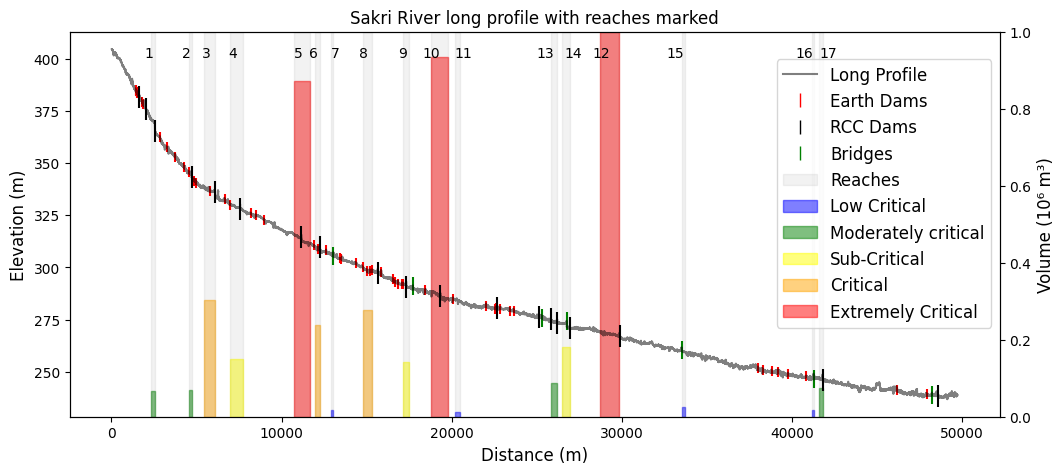

In [ ]:
'''This code imports the csv file containing the thalweg profile.
All rows with "None" values are dropped wile importing the csv.
It then imports the Reach positions and plot them on the same plot.
The volumes of sedimentation is been represented as coloured bars in
secondary axes'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from adjustText import adjust_text
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

#INPUTTING THE DATA

# Replace with the path to your CSV file in Google Drive
file_path1 = '/content/drive/MyDrive/Kawardha/Full_profile.csv' # read the file containing the positions for thedistance and elevation.
file_path2 = '/content/drive/MyDrive/Kawardha/REACH_Positions1.csv' # read the file containing the positions for the reaches.
file_path3 = '/content/drive/MyDrive/Kawardha/Interventions_position.xlsx' # read the file containing the positions for the interventions.

#PREPROCESSING THE DATA

# Read the CSV file and create a DataFrame
df = pd.read_csv(file_path1, low_memory=False,na_values ='None')
df2 = pd.read_csv(file_path2, na_values ='None')
df3 = pd.read_excel(file_path3, sheet_name=1)

# Reject rows with "None" value in any column and save it to the same dataframe
df = df.dropna(how='any')

# Transferrring the dataframe columns `Distance` and `Elevation`
x = df['Distance']
y = df['Elevation']

# Normalize the volume values to be between 0 and 1
df2['Volume'] = df2['Volume'] / df2['Volume'].max()

#PLOTTING THE PROFILE DATA

# making a new plot
fig, ax1 = plt.subplots(figsize=(12,5))

# plot the profile data as a scatter plot
ax1.plot(x, y, label = 'Long Profile', color = 'k', alpha = 0.5)

# Create a custom label for the Long Profile
profile_line = mlines.Line2D([], [], color='k', alpha=0.5, label='Long Profile')

#PLOTTING THE REACHES
'''# Add vertical lines for Reach positions
for start, end, vol in zip(df2['Start'], df2['End'], df2['Volume']):
  ax1.axvspan(start, end, color='red', alpha=0.5, ymin=0, ymax=vol)# add the volumes as ymin and ymax
'''
# Create a dictionary to map classes to colors
class_colors = {
    'Low Critical': 'blue',
    'Moderately critical': 'green',
    'Sub-Critical': 'yellow',
    'Critical': 'orange',
    'Extremely Critical': 'red'
}

#PLOTTING THE REACHES
# Add vertical lines for Reach positions
for start, end, vol, cls in zip(df2['Start'], df2['End'], df2['Volume'], df2['Class']):
  color = class_colors[cls]  # map the class to a color
  ax1.axvspan(start, end, color=color, alpha=0.5, ymin=0, ymax=vol)  # add the volumes as ymin and ymax

# Create custom labels for the classes
low_critical_patch = mpatches.Patch(color='blue', alpha=0.5, label='Low Critical')
moderately_critical_patch = mpatches.Patch(color='green', alpha=0.5, label='Moderately critical')
sub_critical_patch = mpatches.Patch(color='yellow', alpha=0.5, label='Sub-Critical')
critical_patch = mpatches.Patch(color='orange', alpha=0.5, label='Critical')
extremely_critical_patch = mpatches.Patch(color='red', alpha=0.5, label='Extremely Critical')

#Writing the names of the reaches
texts = [] #create a list of texts instead of directly plotting them
for start, end, name in zip(df2['Start'], df2['End'], df2['Reach']):
  plt.axvspan(start, end, color='grey', alpha=0.1)
  texts.append(plt.text((start+end)/2, y.max(), name, horizontalalignment='center'))

#using adjust_text to adjust the overlapping
adjust_text(texts)

# Create a custom label for the Reaches
reach_patch = mpatches.Patch(color='grey', alpha=0.1, label='Reaches')

# Create a custom label for the Volumes
volume_patch = mpatches.Patch(color='red', alpha=0.5, label='Volume')


#PLOTTING THE INTERVENTIONS

#Add crossmarks for intervention positions.
for intervention_type, intervention_length in zip(df3['Type'], df3['Cum_Dist']):
    if intervention_type == 'Earth Dams':
        color = 'red'
        size = 50
        markers = '|'
    elif intervention_type == 'RCC Dams':
        color = 'black'
        size = 250
        markers = '|'
    elif intervention_type == 'Bridges':
        color = 'green'
        size = 150
        markers = '|'
    else:
        color = 'black'
        size = 30
        markers  = 'o'
    ypos = np.interp(intervention_length, x, y) # interpolate to find approximate y position at xpos
    plt.scatter(intervention_length, ypos, color=color, marker= markers, s=size)

# Create custom labels for the interventions
earth_dams_line = plt.Line2D([], [], marker='|', color='red', label='Earth Dams',
                          markerfacecolor='red', markersize=10, linestyle="None", linewidth=5)
rcc_dams_line = plt.Line2D([], [], marker='|', color='black', label='RCC Dams',
                          markerfacecolor='black', markersize=10, linestyle="None", linewidth=5)
bridges_line = plt.Line2D([], [], marker='|', color='green', label='Bridges',
                          markerfacecolor='green', markersize=10, linestyle="None", linewidth=5)

# GROOMING THE PLOT

# Add all legend handles at once
# plt.legend(handles=[profile_line, reach_patch, volume_patch, earth_dams_line, rcc_dams_line, bridges_line], fontsize=12, loc='upper right', bbox_to_anchor=(1, 0.95))

# Add all legend handles at once
plt.legend(handles=[profile_line, earth_dams_line, rcc_dams_line, bridges_line, reach_patch, low_critical_patch, moderately_critical_patch, sub_critical_patch, critical_patch, extremely_critical_patch ], fontsize=12, loc='upper right', bbox_to_anchor=(1, 0.95))

# Add all legend handles at once
#plt.legend(handles=[profile_line, reach_patch, volume_patch, low_critical_patch, moderately_critical_patch, sub_critical_patch, critical_patch, extremely_critical_patch, earth_dams_line, rcc_dams_line, bridges_line], fontsize=12, loc='upper right', bbox_to_anchor=(1, 0.95))

# add axis labels and a title
plt.xlabel('Distance (m)', color ='k', fontsize = 12)
plt.ylabel('Elevation (m)', color ='k', fontsize = 12)
plt.title('Sakri River long profile with reaches marked')

# Create a secondary axis for volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume (10⁶ m³)', color ='k', fontsize = 12)

# show the plot
plt.show()


In [ ]:
# Assuming df, df2, df3, and polynomial function are defined as before

# Create new columns for start elevation and end elevation in df2
df2['Ideal Start Elevation'] = np.nan
df2['Ideal End Elevation'] = np.nan
df2['Actual Start Elevation'] = np.nan
df2['Actual End Elevation'] = np.nan
df2['Reach Length'] = np.nan

# Create new DataFrame to store slope data
slope_data = pd.DataFrame(columns=['Reach','Distance', 'Ideal Slope', 'Actual Slope'])

# Loop over each row in df2
for i in range(len(df2)):
    # Get the start and end distance of the reach
    start = df2.iloc[i]['Start']
    end = df2.iloc[i]['End']

    # Calculate the length of the reach
    reach_length = end - start
    df2.loc[i, 'Reach Length'] = reach_length

    # Create an array of distances from start to end with an interval of 1m
    distances = np.arange(start, end, 1)

    # Use the polynomial equation to map the elevation values for these distances
    ideal_elevations = polynomial(distances)

    # Use the base profile data to map the elevation values for these distances
    actual_elevations = np.interp(distances, df['Distance'], df['Elevation'])

    # Store the elevation in df2
    df2.loc[i, 'Ideal Start Elevation'] = ideal_elevations[0]
    df2.loc[i, 'Ideal End Elevation'] = ideal_elevations[-1]
    df2.loc[i, 'Actual Start Elevation'] = actual_elevations[0]
    df2.loc[i, 'Actual End Elevation'] = actual_elevations[-1]

    # Calculate the slopes for each 1m interval and make them positive
    ideal_slopes = np.abs(np.diff(ideal_elevations) / np.diff(distances))
    actual_slopes = np.abs(np.diff(actual_elevations) / np.diff(distances))

    # Create a temporary DataFrame to store the slope data for this iteration
    temp_data = pd.DataFrame({
        'Reach' : [i+1]*len(distances[:-1]),
        'Distance': distances[:-1],
        'Ideal Slope': ideal_slopes,
        'Actual Slope': actual_slopes
    })

    # Concatenate the temporary DataFrame with the main slope_data DataFrame
    slope_data = pd.concat([slope_data, temp_data], ignore_index=True)

# Print the slope data
print(slope_data)


     Reach  Distance  Ideal Slope  Actual Slope
0        1   2322.27     0.014625      0.250000
1        1   2323.27     0.014623      0.038341
2        1   2324.27     0.014620      0.043367
3        1   2325.27     0.014618      0.106570
4        1   2326.27     0.014615      0.051599
...    ...       ...          ...           ...
7728    17  41820.52     0.001262      0.428534
7729    17  41821.52     0.001262      0.077798
7730    17  41822.52     0.001262      0.251801
7731    17  41823.52     0.001262      0.094012
7732    17  41824.52     0.001262      0.053221

[7733 rows x 4 columns]


**Plotting Reachwise profile , intervention and marking areas above and below the profile line**

KeyError: 'explode'

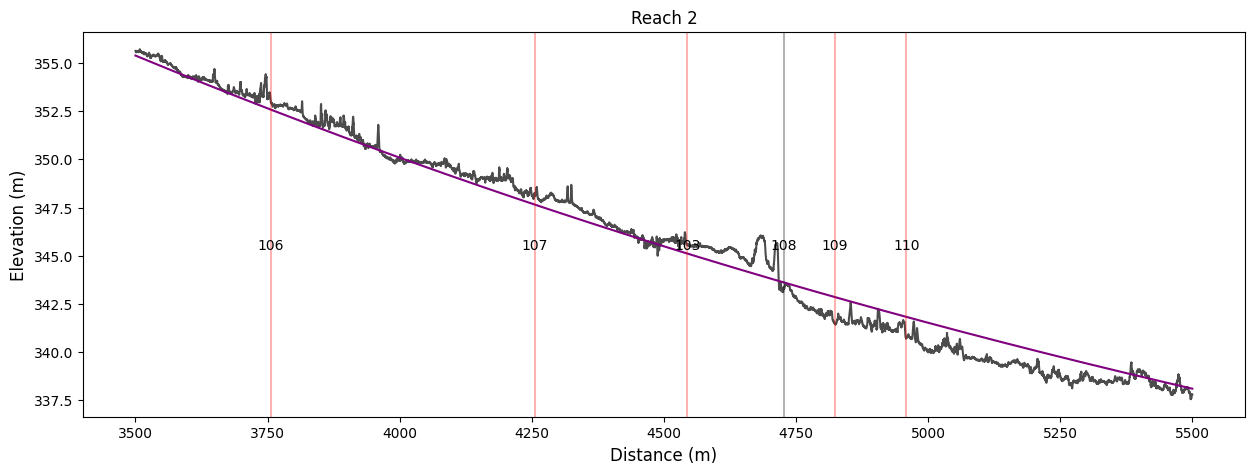

In [ ]:
'''This code imports the csv file containing the thalweg profile.
All rows with "None" values are dropped wile importing the csv.
It then imports the Reach positions and plot them on the same plot.
The volumes of sedimentation is been represented as coloured bars in
secondary axes'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from adjustText import adjust_text
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

#INPUTTING THE DATA

# Replace with the path to your CSV file in Google Drive
file_path1 = '/content/drive/MyDrive/Kawardha/Full_profile.csv' # read the file containing the positions for thedistance and elevation.
file_path2 = '/content/drive/MyDrive/Kawardha/REACH_Positions1.csv' # read the file containing the positions for the reaches.
file_path3 = '/content/drive/MyDrive/Kawardha/Interventions_position.xlsx' # read the file containing the positions for the interventions.

#Input the max and min profile length to plot
x_max = 5500
x_min = 3500


#PREPROCESSING THE DATA

# Read the CSV file and create a DataFrame
df = pd.read_csv(file_path1, low_memory=False,na_values ='None')
df2 = pd.read_csv(file_path2, na_values ='None')
df3 = pd.read_excel(file_path3, sheet_name=1)

# Reject rows with "None" value in any column and save it to the same dataframe
df = df.dropna(how='any')
#df3['id'] = df3['id'].astype(int) #else it will display 102 as 102.0

# assuming that your DataFrame is named `df` and has columns `Distance` and `Elevation`
x = df['Distance']
y = df['Elevation']

x_inter=df3['Cum_Dist']
interventions = df3['id']

# fit an 11-degree polynomial to the data
coefficients = np.polyfit(x, y, 11)

# create a polynomial object using the fitted coefficients
polynomial = np.poly1d(coefficients)

# print the polynomial equation
#print(f'Polynomial equation: {polynomial}')

# use the polynomial equation to map between x=2323.979946 and x=2553.295383
mask = (x >= x_min) & (x <= x_max)
x_new = x[mask] # use the same x values as the original
y_new = polynomial(x_new)

# create a new mask for the x_inter variable
x_inter_mask = (x_inter >= x_min) & (x_inter <= x_max)

# create a new DataFrame with the same columns as the original
df_new = df.copy()

# replace the original elevation values with the predicted values
df_new.loc[mask, 'Elevation'] = y_new

# save the new DataFrame to a csv file
df_new[mask].to_csv('new_data.csv', index=False)

# save the polynomial equation into a csv file
df = pd.DataFrame({'coefficients': coefficients})
df.to_csv('polynomial.csv', index=False)

# making a new plot
fig = plt.figure(figsize=(15,5))
# plot the original cross-section and the predicted values only between x=2323.979946 and x=2553.295383
plt.plot(x[mask], y[mask], label = 'Long Profile', color = 'k', alpha = 0.7)
plt.plot(x_new, y_new, label='Long profile fit', color = 'purple')

# add axis labels and a title
plt.xlabel('Distance (m)', color ='k', fontsize = 12)
plt.ylabel('Elevation (m)', color ='k', fontsize = 12)
plt.title('Reach 2')

color_dict = {
    'Earth Dams': 'red',
    'RCC Dams': 'black',
    'Bridges': 'green',
    # add more types and colors as needed
}

# get the limits of the axes
x_lim = plt.gca().get_xlim()
y_lim = plt.gca().get_ylim()

texts = []  # to store the labels

for xpos, label in zip(x_inter[x_inter_mask], interventions[x_inter_mask]):
    # get the intervention type for this label
    intervention_type = df3.loc[df3['id'] == label, 'Type'].values[0]
    # get the color for this intervention type
    color = color_dict.get(intervention_type, 'grey')  # default to 'grey' if the type is not in the dictionary
    plt.axvline(x=xpos, color=color, linestyle='-', alpha = 0.3)
    # calculate the position of the label
    label_position = (xpos, y_lim[1] * 0.97)  # place the label at 95% of the y-axis height
    # check if the label position is within the limits of the plot
    if x_lim[0] <= label_position[0] <= x_lim[1]:
        texts.append(plt.text(label_position[0], label_position[1], f'{str(label)}', ha='center', va='top'))  # adjust these parameters as needed

# adjust the positions of the labels to minimize overlaps
adjust_text(texts, autoalign='y', only_move={'points':'y', 'text':'y'})

# Create legend handles for each intervention type
handles = [plt.Line2D([0], [0], color=color, lw=2) for color in color_dict.values()]
labels = list(color_dict.keys())

# shade the area below long profile fit and long profile in yellow
plt.fill_between(x_new, y_new, y[mask], where=(y_new >= y[mask]), interpolate=True, color='grey', alpha=0.3, label = 'Erosional Zone')

# shade the area above long profile fit and long profile in grey
plt.fill_between(x_new, y_new, y[mask], where=(y_new <= y[mask]), interpolate=True, color='yellow', alpha=0.3, label = 'Sedimentation Zone')

#create a custom label for the interventions
plt.plot([],[], color = 'red', linestyle = '-', alpha = 0.8, label = 'Earth Dams')
plt.plot([],[], color = 'blue', linestyle = '-', alpha = 0.8, label = 'RCC Dams')
plt.plot([],[], color = 'green', linestyle = '-', alpha = 0.8, label = 'Bridges')

plt.tight_layout()
plt.legend(fontsize=12)
plt.show()


***Calculating the slope of each reach***

In [ ]:

df = pd.read_csv(file_path1, low_memory=False,na_values ='None')
df2 = pd.read_csv(file_path2, na_values ='None')
df3 = pd.read_excel(file_path3, sheet_name=1)

# Reject rows with "None" value in any column and save it to the same dataframe
df = df.dropna(how='any')

# Create new columns for start elevation and end elevation in df2
df2['Ideal Start Elevation'] = np.nan
df2['Ideal End Elevation'] = np.nan
df2['Ideal Slope (per 1000m)'] =np.nan
df2['Reach Length'] = np.nan
df2['Actual Start Elevation'] = np.nan
df2['Actual End Elevation'] = np.nan
df2['Actual Slope (per 1000m)'] =np.nan

# Create a new column for average slope in df2
df2['Average Slope (per 1000m)'] = np.nan

# Loop over each row in df2
for i in range(len(df2)):
    # Get the start and end distance of the reach
    start = df2.iloc[i]['Start']
    end = df2.iloc[i]['End']

    # Use the polynomial equation to map the elevation values for the start and end distance
    ideal_start_elevation = polynomial(start)
    ideal_end_elevation = polynomial(end)

    # Use the base profile data to map the elevation values for the start and end distance
    actual_start_elevation = np.interp(start, df['Distance'], df['Elevation'])
    actual_end_elevation = np.interp(end, df['Distance'], df['Elevation'])

    # Store the elevation in df2
    df2.loc[i, 'Ideal Start Elevation'] = ideal_start_elevation
    df2.loc[i, 'Ideal End Elevation'] = ideal_end_elevation
    df2.loc[i, 'Actual Start Elevation'] = actual_start_elevation
    df2.loc[i, 'Actual End Elevation'] = actual_end_elevation

    # Calculate the length of the reach
    reach_length = end - start

    #calculating average slope
    # Create an array of distances from start to end with an interval of 1m
    distances = np.arange(start, end, 1)

    # Use the base profile data to map the elevation values for these distances
    elevations = np.interp(distances, df['Distance'], df['Elevation'])

    # Calculate the slopes for each 1m interval
    slopes = np.diff(elevations) / np.diff(distances)

    # Calculate the average slope
    average_slope = -np.mean(slopes)


    # Calculate the slope
    ideal_slope = (ideal_start_elevation - ideal_end_elevation) / (end - start)
    actual_slope = (actual_start_elevation - actual_end_elevation) / (end - start)

    # Store the slope in df2
    df2.loc[i, 'Ideal Slope (per 1000m)'] = ideal_slope*1000
    df2.loc[i, 'Actual Slope (per 1000m)'] = actual_slope*1000
    df2.loc[i, 'Average Slope (per 1000m)'] = average_slope*1000
    df2.loc[i, 'Reach Length'] = reach_length
df2


,Reach,Start,End,Volume,Class,Ideal Start Elevation,Ideal End Elevation,Ideal Slope (per 1000m),Reach Length,Actual Start Elevation,Actual End Elevation,Actual Slope (per 1000m),Average Slope (per 1000m)
0,1,2322.27,2554.84,7967.0,Moderately critical,370.720564,367.386169,14.337167,232.57,370.970001,366.135123,20.788915,18.697048
1,2,4540.94,4711.43,8141.5,Moderately critical,345.142200,343.740389,8.222246,170.49,345.915154,345.579987,1.965904,2.030273
2,3,5469.65,6093.39,35438.0,Critical,338.299756,334.631993,5.880276,623.74,338.369275,334.842189,5.654738,5.125018
3,4,6983.17,7724.01,17500.5,Sub-Critical,330.289739,327.176575,4.202209,740.84,330.203690,327.570007,3.554996,3.653636
4,5,10751.47,11685.40,101955.6,Extremely Critical,315.508837,311.757037,4.017218,933.93,316.056148,311.519989,4.857065,4.883331
5,6,11979.59,12265.11,27837.0,Critical,310.560153,309.395735,4.078236,285.52,309.718556,308.200754,5.315920,5.568669
6,7,12885.60,13014.64,2120.4,Low Critical,306.869032,306.346310,4.050852,129.04,306.380005,305.941904,3.395080,3.410872
7,8,14809.37,15331.63,32452.9,Critical,299.356224,297.474474,3.603092,522.26,299.661299,298.529999,2.166162,2.167241
8,9,17157.19,17503.56,16686.8,Sub-Critical,291.649160,290.684144,2.786086,346.37,291.649927,290.259979,4.012898,3.988260
9,10,18803.18,19775.43,109165.7,Extremely Critical,287.441154,285.353542,2.147197,972.25,286.169983,285.160331,1.038469,1.026238


`ROUGH`

To find places where long profile elevation exceeds fit profile


In [ ]:
# create a mask for where the long profile is higher than the long profile fit
mask_higher = y[mask] > y_new

# calculate the area under the long profile where it is higher than the long profile fit
area_profile_higher = np.trapz(y[mask][mask_higher], x[mask][mask_higher])

# calculate the area under the long profile fit where the long profile is higher than it
area_fit_higher = np.trapz(y_new[mask_higher], x_new[mask_higher])

# calculate the area where the long profile is higher than the long profile fit
area_higher = np.abs(area_profile_higher - area_fit_higher)

# create a mask for where the long profile fit is higher than the long profile
mask_lower = y[mask] < y_new

# calculate the area under the long profile fit where it is higher than the long profile
area_fit_lower = np.trapz(y_new[mask_lower], x_new[mask_lower])

# calculate the area under the long profile where the long profile fit is higher than it
area_profile_lower = np.trapz(y[mask][mask_lower], x[mask][mask_lower])

# calculate the area where the long profile fit is higher than the long profile
area_lower = np.abs(area_fit_lower - area_profile_lower)

# print both areas
print(f'Area where long profile is higher than long profile fit: {area_higher:.2f}')
print(f'Area where long profile fit is higher than long profile: {area_lower:.2f}')


Area where long profile is higher than long profile fit: 546.72
Area where long profile fit is higher than long profile: 654.55


In [ ]:
'''This code creates a 3D scatter plot of the data in the DataFrame using the plotly
library. The x, y, and z parameters specify which columns of the DataFrame to use
for the x, y, and z coordinates of the points.
'''
import plotly.express as px

# assuming that your DataFrame is named `df` and has columns `Longitude`, `Latitude`, and `Elevation`
fig = px.scatter_3d(df, x='Longitude', y='Latitude', z='Elevation')
fig.show()


We iterated as long as r2 value reached consistency and there was no improvement.

Could not fit a polynomial of degree 14 to the data.
Could not fit a polynomial of degree 15 to the data.
Could not fit a polynomial of degree 16 to the data.
Could not fit a polynomial of degree 17 to the data.
Could not fit a polynomial of degree 18 to the data.
Could not fit a polynomial of degree 19 to the data.
Could not fit a polynomial of degree 20 to the data.


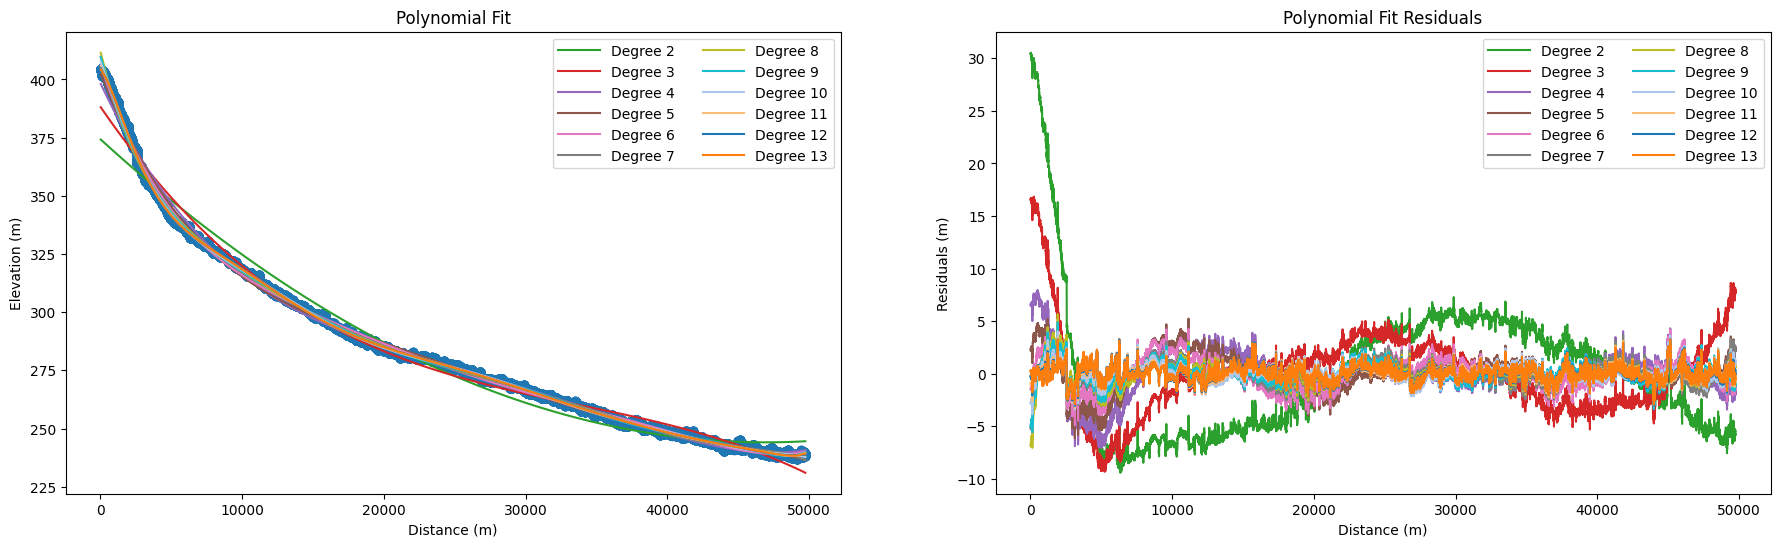

,Degree 2,Degree 3,Degree 4,Degree 5,Degree 6,Degree 7,Degree 8,Degree 9,Degree 10,Degree 11,Degree 12,Degree 13,Degree 14,Degree 15,Degree 16,Degree 17,Degree 18,Degree 19,Degree 20
0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.005546,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,374.282866,-0.008871,0.000001,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,388.225462,-0.012863,0.000001,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,398.330246,-0.015433,0.000002,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,402.672761,-0.018563,0.000003,-0.0,-0.0,0.0,-0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,406.450767,-0.022805,0.000004,-0.0,-0.0,0.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,410.282077,-0.025224,0.000002,0.0,-0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,411.97861,-0.021795,-0.000001,0.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.052823,-0.01678,-0.000004,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''The code do the following:
1. Fits polynomials of degrees 2 to 20 to a dataset with columns Distance
and Elevation
2. Calculates the standard deviation of the residuals, the R-squared value.
3. Plots both the fitted polynomials and the residuals.
4. Creates a table of coefficients, R-squared values, and standard deviations for
each degree.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Segregating columns `Distance` and `Elevation`
x = df['Distance']
y = df['Elevation']

# create empty lists to store the coefficients, R-squared values, and standard deviations
coefficients_lists = [[] for _ in range(2, 21)]
r_squared_list = []
standard_deviation_list = []

# create a new figure with a larger size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

# define colours to keep them distinguished
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

# fit polynomials of degrees 2 to 20 to the data
for degree in range(2, 21):
    try:
        # fit a polynomial of the current degree to the data
        coefficients, residuals, _, _, _ = np.polyfit(x, y, degree, full=True)

        # calculate the standard deviation of the residuals
        standard_deviation = np.sqrt(residuals[0] / (len(x) - degree - 1))

        # create a polynomial object using the fitted coefficients
        polynomial = np.poly1d(coefficients)

        # evaluate the polynomial at the original x values
        y_fit = polynomial(x)

        # calculate the R-squared value
        r_squared = r2_score(y, y_fit)

        # add the R-squared value and standard deviation to their respective lists as formatted strings
        r_squared_list.append(f'{r_squared:.5f}')
        standard_deviation_list.append(f'{standard_deviation:.5f}')

        # evaluate the polynomial at a set of x values for plotting
        x_fit = np.linspace(x.min(), x.max(), 100)
        y_plot = polynomial(x_fit)

        # plot the fitted polynomial on first subplot
        ax1.plot(x_fit, y_plot, label=f'Degree {degree}', color=colors[degree % len(colors)])

        # calculate the residuals again for residuals plot
        y_residuals = y - y_fit

        # plot the residuals again for residuals plot on second subplot
        ax2.plot(x, y_residuals, label=f'Degree {degree}', color=colors[degree % len(colors)])

        # add the coefficients to their corresponding list
        coefficients_lists[degree - 2].extend(coefficients)
    except IndexError:
        print(f'Could not fit a polynomial of degree {degree} to the data.')
        r_squared_list.append(None)
        standard_deviation_list.append(None)

# plot the original data as a scatter plot on first subplot
ax1.scatter(x, y)

# add a legend to both subplots with loc and bbox_to_anchor parameters
ax1.legend(loc='upper right', ncol=2, handlelength=3)
ax2.legend(loc='upper right', ncol=2, handlelength=3)

# add axis labels and titles to both subplots
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Elevation (m)')
ax1.set_title('Polynomial Fit')
ax2.set_xlabel('Distance (m)')
ax2.set_ylabel('Residuals (m)')
ax2.set_title('Polynomial Fit Residuals')

# show both subplots on one figure
plt.show()

# create a DataFrame from the lists of coefficients
coefficients_df = pd.DataFrame(coefficients_lists).T
coefficients_df.columns = [f'Degree {degree}' for degree in range(2, 21)]

# add rows with the formatted R-squared values and standard deviations to the DataFrame
coefficients_df.loc['R-squared'] = r_squared_list
coefficients_df.loc['Standard Deviation'] = standard_deviation_list

# display the table of coefficients, R-squared values, and standard deviations
display(coefficients_df)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.metrics import r2_score

# Replace with the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Kawardha/Full_profile.csv'

# Read the CSV file and create a DataFrame
df = pd.read_csv(file_path, low_memory=False,na_values ='None')

# Reject rows with "None" value in any column and save it to the same dataframe
df = df.dropna(how='any')
print(df)

# read the file containing the positions for the interventions.
df_xpos = pd.read_excel('/content/drive/MyDrive/Kawardha/Interventions_position.xlsx')
print(df_xpos)

# assuming that your DataFrame is named `df` and has columns `Distance` and `Elevation`
x = df['Distance']
y = df['Elevation']

# fit an 11th-degree polynomial to the data
coefficients, residuals, _, _, _ = np.polyfit(x, y, 11, full=True)

# calculate the standard deviation of the residuals
standard_deviation = np.sqrt(residuals[0] / (len(x) - 11 - 1))

# create a polynomial object using the fitted coefficients
polynomial = np.poly1d(coefficients)

# evaluate the polynomial at the original x values
y_fit = polynomial(x)

# calculate the R-squared value
r_squared = r2_score(y, y_fit)

# evaluate the polynomial at a set of x values for plotting
x_fit = np.linspace(x.min(), x.max(), 100)
y_plot = polynomial(x_fit)

# calculate the standard error of the estimate
n = len(x)
m = len(coefficients)
design_matrix = np.vander(x, m)
hat_matrix = design_matrix @ np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T
y_err = y - y_fit
s2 = np.sum(y_err**2) / (n - m)
se = np.sqrt(np.diag(s2 * hat_matrix))

# calculate the degrees of freedom for a t-distribution
dof = n - m

# calculate the critical value for a 95% confidence interval
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, dof)

# calculate the upper and lower bounds of the confidence band
lower_bound = y_fit - t_crit * se
upper_bound = y_fit + t_crit * se

# plot the fitted polynomial and the original data as a scatter plot
plt.plot(x_fit, y_plot, label='Degree 11')
plt.scatter(x, y)

# add the confidence band to the plot
plt.fill_between(x, lower_bound, upper_bound, color='grey', alpha=0.5)

# add a legend to the plot
plt.legend()

# add axis labels and a title
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m)')
plt.title('Polynomial Fit with Confidence Band')

# show the plot
plt.show()


            Distance    Longitude     Latitude   Elevation
194        20.222632  512890.5450  2443528.197  404.630005
195        20.331707  512890.6454  2443528.240  404.609985
196        20.440783  512890.7458  2443528.283  404.579987
197        20.549858  512890.8462  2443528.325  404.569977
198        20.658933  512890.9465  2443528.368  404.559998
...              ...          ...          ...         ...
446630  49722.555430  536759.5797  2433750.171  238.699997
446631  49722.659460  536759.5511  2433750.071  238.709992
446632  49722.763480  536759.5225  2433749.971  238.699997
446633  49722.867510  536759.4938  2433749.871  238.699997
446634  49722.971530  536759.4652  2433749.771  238.720001

[446441 rows x 4 columns]
     Distance  Placeholder
0         NaN          NaN
1    1624.930          1.0
2    2038.681          1.0
3    2556.365          1.0
4    2838.325          1.0
..        ...          ...
58  46155.230          1.0
59  47924.750          1.0
60  48253.535         

In [ ]:
'''This python code finds the points where the predicted and real elevations cross.
It then makes a dtafram noting down all the points and saves into two separate csv file
as per the difference between them.
'''
'''This code imports the csv file containing the thalweg profile.
All rows with "None" values are dropped wile importing the csv.
It then imports the Reach positions and plot them on the same plot.
The volumes of sedimentation is been represented as coloured bars in
secondary axes'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from adjustText import adjust_text
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

#INPUTTING THE DATA

# Replace with the path to your CSV file in Google Drive
file_path1 = '/content/drive/MyDrive/Kawardha/Full_profile.csv' # read the file containing the positions for thedistance and elevation.
file_path2 = '/content/drive/MyDrive/Kawardha/REACH_Positions1.csv' # read the file containing the positions for the reaches.
file_path3 = '/content/drive/MyDrive/Kawardha/Interventions_position.xlsx' # read the file containing the positions for the interventions.

#Input the max and min profile length to plot
x_max = 5500
x_min = 3500
#PREPROCESSING THE DATA

# Read the CSV file and create a DataFrame
df = pd.read_csv(file_path1, low_memory=False,na_values ='None')
df2 = pd.read_csv(file_path2, na_values ='None')
df3 = pd.read_excel(file_path3, sheet_name=1)

# Reject rows with "None" value in any column and save it to the same dataframe
df = df.dropna(how='any')
#df3['id'] = df3['id'].astype(int) #else it will display 102 as 102.0

# assuming that your DataFrame is named `df` and has columns `Distance` and `Elevation`
x = df['Distance']
y = df['Elevation']

x_inter=df3['Cum_Dist']
interventions = df3['id']

# assuming that your DataFrame is named `df` and has columns `Distance` and `Elevation`
x = df['Distance']
y = df['Elevation']

# fit an 11th-degree polynomial to the data
coefficients = np.polyfit(x, y, 11)

# create a polynomial object using the fitted coefficients
polynomial = np.poly1d(coefficients)

# evaluate the polynomial at the original x values
y_fit = polynomial(x)

# calculate the difference between the fitted y values and the original y values
y_diff = y - y_fit

# find the indices where the sign of y_diff changes
crossing_indices = np.where(np.diff(np.sign(y_diff)))[0]

# create a new DataFrame with the crossing points
crossing_df = df.iloc[crossing_indices].copy()
crossing_df['y_diff'] = y_diff.iloc[crossing_indices]

# separate the crossing points into two DataFrames, one with positive values and another with negative values
positive_df = crossing_df[crossing_df['y_diff'] > 0].copy()
negative_df = crossing_df[crossing_df['y_diff'] < 0].copy()

# display the new DataFrames
print(positive_df)
print(negative_df)

positive_df.to_csv('positive_points.csv',index=False)
negative_df.to_csv('negative_points.csv',index=False)

            Distance    Longitude     Latitude   Elevation    y_diff
2074      232.219124  513061.6146  2443486.331  402.959992  0.045868
2076      232.445712  513061.8172  2443486.229  402.929993  0.018913
2255      253.042347  513074.8124  2443471.842  402.679993  0.046838
2259      253.586918  513075.2243  2443471.486  402.630005  0.004230
2527      283.557241  513102.1895  2443461.671  402.220001  0.002914
...              ...          ...          ...         ...       ...
445229  49579.515490  536773.5214  2433890.634  239.159988  0.019871
445328  49589.450450  536773.1488  2433880.706  239.179993  0.016876
445361  49592.762100  536773.0245  2433877.396  239.199997  0.029131
445492  49605.913210  536772.9441  2433864.259  239.209992  0.007937
445631  49619.878330  536773.7867  2433850.320  239.250000  0.014096

[1388 rows x 5 columns]
            Distance    Longitude     Latitude   Elevation    y_diff
2070      231.765947  513061.2093  2443486.534  402.609985 -0.310225
2075     